# Построение модели дохода от Альфа-Банка

## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных

- Тренировочный датасет hackathon_income_train.csv
- Тестовый датасет hackathon_income_test.csv
- Описание признаков feactures_description.csv

[Ссылка для скачивания данных](https://drive.google.com/drive/folders/1qe6S7cm_89P4sPQ7sZ2zUX1DohUOihsv?usp=sharing), далее их нужно загрузить в одну папку с решением

In [ ]:
features_description_df = pd.read_csv('features_description.csv', decimal=',', sep=';', encoding='windows-1251')
features_description_df


,признак,описание
0,dt,Дата актуальности признаков
1,target,таргет
2,turn_cur_cr_avg_act_v2,Средний текущий кредитовый оборот по текущим с...
3,salary_6to12m_avg,Усреднённая ЗП клиента за окно в минимум 6 мес...
4,hdb_bki_total_max_limit,БКИ: Максимальный кредитный лимит по любому пр...
...,...,...
219,transaction_category_supermarket_sum_cnt_d15,Количество транзакций в категории Супермаркеты...
220,max_balance_rur_amt_1m_af,Максимальный баланс за последний месяц по всем...
221,id,id клиента
222,w,вес


In [ ]:
train_df = pd.read_csv('hackathon_income_train.csv', decimal=',', sep=';')
train_df.shape

/tmp/ipython-input-1881147055.py:1: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('hackathon_income_train.csv', decimal=',', sep=';')


(50973, 224)

In [ ]:
test_df = pd.read_csv('hackathon_income_test.csv', decimal=',', sep=';')
test_df.shape

/tmp/ipython-input-3568537523.py:1: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('/content/sample_data/hackathon_income_test.csv', decimal=',', sep=';')


(73214, 222)

## Основные характеристики данных

In [ ]:
pd.set_option('display.max_info_columns', 350)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Data columns (total 224 columns):
 #    Column                                                                                           Non-Null Count  Dtype  
---   ------                                                                                           --------------  -----  
 0    id                                                                                               76786 non-null  int64  
 1    dt                                                                                               76786 non-null  object 
 2    target                                                                                           76786 non-null  float64
 3    turn_cur_cr_avg_act_v2                                                                           59078 non-null  float64
 4    salary_6to12m_avg                                                                                14875 non-null  float64
 

In [ ]:
train_df.describe(include = ['O']).transpose()

,count,unique,top,freq
dt,76786,6,2024-06-30,16214
hdb_bki_total_max_limit,67413,26616,150000.0,918
hdb_bki_total_cc_max_limit,63041,6385,0.0,2768
gender,76786,2,Мужской,40121
adminarea,57223,85,г. Москва,8938
hdb_bki_total_pil_max_limit,62001,27641,300000.0,1151
hdb_bki_active_cc_max_limit,56866,4481,150000.0,2216
city_smart_name,67323,105,Москва,23230
hdb_bki_other_active_pil_outstanding,35622,31826,0.0,2983
dp_ewb_last_employment_position,15081,6093,Продавец-кассир,517


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,76786.0,7.507025e+04,4.336228e+04,2.000000,37519.250000,74975.500000,1.128355e+05,1.499990e+05
target,76786.0,9.264824e+04,1.124090e+05,20000.000000,39709.970196,62754.135000,1.002017e+05,1.500000e+06
turn_cur_cr_avg_act_v2,59078.0,1.170105e+06,2.205263e+06,0.010000,203976.802500,594020.437500,1.268697e+06,6.545863e+07
salary_6to12m_avg,14875.0,1.174897e+05,1.603782e+05,20003.739558,48729.088803,73092.407991,1.222903e+05,3.419392e+06
dp_ils_paymentssum_avg_12m,16503.0,2.162228e+05,2.538178e+05,2.648938,92808.775784,149711.981885,2.422720e+05,4.754632e+06
...,...,...,...,...,...,...,...,...
label_Above_1M_share_r1,34010.0,8.593348e-03,2.244041e-02,0.000000,0.000000,0.000000,7.462687e-03,4.285714e-01
transaction_category_supermarket_sum_cnt_d15,34934.0,1.290929e+01,1.121436e+01,1.000000,5.000000,10.000000,1.800000e+01,1.330000e+02
max_balance_rur_amt_1m_af,11133.0,1.360850e+05,2.517752e+06,-2.000000,2.000000,525.000000,4.058000e+03,2.374923e+08
w,76786.0,5.690139e-01,5.518351e-01,0.000021,0.235950,0.449424,6.803373e-01,2.570703e+00


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73214 entries, 0 to 73213
Data columns (total 222 columns):
 #    Column                                                                                           Non-Null Count  Dtype  
---   ------                                                                                           --------------  -----  
 0    id                                                                                               73214 non-null  int64  
 1    dt                                                                                               73214 non-null  object 
 2    turn_cur_cr_avg_act_v2                                                                           57244 non-null  float64
 3    salary_6to12m_avg                                                                                7634 non-null   float64
 4    hdb_bki_total_max_limit                                                                          62809 non-null  object 
 

## Удаление столбца 'id'

In [ ]:
train_df.drop('id', axis=1, inplace=True)
id_test = test_df['id']
test_df.drop('id', axis=1, inplace=True)

## Отсутствующие значения

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
avg_by_category__amount__sum__cashflowcategory_name__platezhi_cherez_internet,75589,0.984411
turn_fdep_db_avg_act_v2,74461,0.969721
turn_fdep_db_sum_v2,72950,0.950043
turn_fdep_db_avg_v2,72950,0.950043
avg_by_category__amount__sum__cashflowcategory_name__reklama_v_internete,71564,0.931993
...,...,...
dt,0,0.000000
age,0,0.000000
gender,0,0.000000
nonresident_flag,0,0.000000


In [ ]:
def select_best_features(train_df, feature_group, correlation_threshold=0.7):
    non_null_counts = {feature: train_df[feature].notna().sum() for feature in feature_group}
    corr_matrix = train_df[feature_group].corr().abs()
    selected = []
    removed = []
    sorted_features = sorted(feature_group, key=lambda x: non_null_counts[x], reverse=True)
    print("АНАЛИЗ ПРИЗНАКОВ:")
    print(f"Порог корреляции: {correlation_threshold}")
    print("Сортировка по количеству данных:")
    for i, feature in enumerate(sorted_features):
        print(f"  {i+1}. {feature}: {non_null_counts[feature]} непустых")
    for current_feature in sorted_features:
        if current_feature in removed:
            continue
        is_highly_correlated = False
        for selected_feature in selected:
            correlation = corr_matrix.loc[current_feature, selected_feature]
            if correlation > correlation_threshold:
                is_highly_correlated = True
                print(f"\nВЫСОКАЯ КОРРЕЛЯЦИЯ: {current_feature} <-> {selected_feature} = {correlation:.3f}")
                if non_null_counts[current_feature] > non_null_counts[selected_feature]:
                    print(f"  ЗАМЕНА: {selected_feature} -> {current_feature} (больше данных)")
                    selected.remove(selected_feature)
                    removed.append(selected_feature)
                    selected.append(current_feature)
                else:
                    print(f"  УДАЛЕНИЕ: {current_feature} (меньше данных чем {selected_feature})")
                    removed.append(current_feature)

                break
        if not is_highly_correlated and current_feature not in selected and current_feature not in removed:
            selected.append(current_feature)
            print(f"\nДОБАВЛЕН: {current_feature}")
    return selected, removed

In [ ]:
rem_feat = set()

## Группа "Средний кредитовый оборот по текущим счетам"

In [ ]:
df = train_df[['turn_cur_cr_avg_act_v2', 'avg_cur_cr_turn', 'turn_cur_cr_avg_v2', 'avg_credit_turn_rur', 'turn_cur_cr_7avg_avg_v2']]
df.corr()

,turn_cur_cr_avg_act_v2,avg_cur_cr_turn,turn_cur_cr_avg_v2,avg_credit_turn_rur,turn_cur_cr_7avg_avg_v2
turn_cur_cr_avg_act_v2,1.000000,0.751219,0.893553,0.588966,0.248836
avg_cur_cr_turn,0.751219,1.000000,0.839011,0.786678,0.342056
turn_cur_cr_avg_v2,0.893553,0.839011,1.000000,0.672775,0.266843
avg_credit_turn_rur,0.588966,0.786678,0.672775,1.000000,0.253705
turn_cur_cr_7avg_avg_v2,0.248836,0.342056,0.266843,0.253705,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['turn_cur_cr_avg_act_v2', 'avg_cur_cr_turn', 'turn_cur_cr_avg_v2', 'avg_credit_turn_rur', 'turn_cur_cr_7avg_avg_v2'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. avg_cur_cr_turn: 60214 непустых
  2. avg_credit_turn_rur: 60214 непустых
  3. turn_cur_cr_avg_v2: 59432 непустых
  4. turn_cur_cr_7avg_avg_v2: 59432 непустых
  5. turn_cur_cr_avg_act_v2: 59078 непустых

ДОБАВЛЕН: avg_cur_cr_turn

ВЫСОКАЯ КОРРЕЛЯЦИЯ: avg_credit_turn_rur <-> avg_cur_cr_turn = 0.787
  УДАЛЕНИЕ: avg_credit_turn_rur (меньше данных чем avg_cur_cr_turn)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_cr_avg_v2 <-> avg_cur_cr_turn = 0.839
  УДАЛЕНИЕ: turn_cur_cr_avg_v2 (меньше данных чем avg_cur_cr_turn)

ДОБАВЛЕН: turn_cur_cr_7avg_avg_v2

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_cr_avg_act_v2 <-> avg_cur_cr_turn = 0.751
  УДАЛЕНИЕ: turn_cur_cr_avg_act_v2 (меньше данных чем avg_cur_cr_turn)
Выбранные: ['avg_cur_cr_turn', 'turn_cur_cr_7avg_avg_v2']
Удаленные: ['avg_credit_turn_rur', 'turn_cur_cr_avg_v2', 'turn_cur_cr_avg_act_v2']


## Группа "Средний дебетовый оборот по текущим счетам"

In [ ]:
df = train_df[['turn_cur_db_avg_act_v2', 'avg_cur_db_turn', 'turn_cur_db_avg_v2', 'avg_debet_turn_rur', 'turn_cur_db_7avg_avg_v2']]
df.corr()

,turn_cur_db_avg_act_v2,avg_cur_db_turn,turn_cur_db_avg_v2,avg_debet_turn_rur,turn_cur_db_7avg_avg_v2
turn_cur_db_avg_act_v2,1.000000,0.750805,0.893072,0.590751,0.225984
avg_cur_db_turn,0.750805,1.000000,0.840131,0.785989,0.317846
turn_cur_db_avg_v2,0.893072,0.840131,1.000000,0.676241,0.248642
avg_debet_turn_rur,0.590751,0.785989,0.676241,1.000000,0.256163
turn_cur_db_7avg_avg_v2,0.225984,0.317846,0.248642,0.256163,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['turn_cur_db_avg_act_v2', 'avg_cur_db_turn', 'turn_cur_db_avg_v2', 'avg_debet_turn_rur', 'turn_cur_db_7avg_avg_v2'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. avg_cur_db_turn: 60214 непустых
  2. avg_debet_turn_rur: 60214 непустых
  3. turn_cur_db_avg_v2: 59432 непустых
  4. turn_cur_db_7avg_avg_v2: 59432 непустых
  5. turn_cur_db_avg_act_v2: 58580 непустых

ДОБАВЛЕН: avg_cur_db_turn

ВЫСОКАЯ КОРРЕЛЯЦИЯ: avg_debet_turn_rur <-> avg_cur_db_turn = 0.786
  УДАЛЕНИЕ: avg_debet_turn_rur (меньше данных чем avg_cur_db_turn)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_db_avg_v2 <-> avg_cur_db_turn = 0.840
  УДАЛЕНИЕ: turn_cur_db_avg_v2 (меньше данных чем avg_cur_db_turn)

ДОБАВЛЕН: turn_cur_db_7avg_avg_v2

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_db_avg_act_v2 <-> avg_cur_db_turn = 0.751
  УДАЛЕНИЕ: turn_cur_db_avg_act_v2 (меньше данных чем avg_cur_db_turn)
Выбранные: ['avg_cur_db_turn', 'turn_cur_db_7avg_avg_v2']
Удаленные: ['avg_debet_turn_rur', 'turn_cur_db_avg_v2', 'turn_cur_db_avg_act_v2']


## Группа "Суммарные и максимальные обороты"

In [ ]:
df = train_df[['turn_cur_cr_sum_v2', 'turn_cur_cr_max_v2', 'turn_cur_db_sum_v2', 'turn_cur_db_max_v2', 'turn_cur_cr_min_v2', 'turn_cur_db_min_v2']]
df.corr()

,turn_cur_cr_sum_v2,turn_cur_cr_max_v2,turn_cur_db_sum_v2,turn_cur_db_max_v2,turn_cur_cr_min_v2,turn_cur_db_min_v2
turn_cur_cr_sum_v2,1.000000,0.773151,0.999184,0.761414,0.569116,0.569214
turn_cur_cr_max_v2,0.773151,1.000000,0.771261,0.957236,0.481711,0.480556
turn_cur_db_sum_v2,0.999184,0.771261,1.000000,0.763157,0.567811,0.569707
turn_cur_db_max_v2,0.761414,0.957236,0.763157,1.000000,0.463565,0.466395
turn_cur_cr_min_v2,0.569116,0.481711,0.567811,0.463565,1.000000,0.997954
turn_cur_db_min_v2,0.569214,0.480556,0.569707,0.466395,0.997954,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['turn_cur_cr_sum_v2', 'turn_cur_cr_max_v2', 'turn_cur_db_sum_v2', 'turn_cur_db_max_v2', 'turn_cur_cr_min_v2', 'turn_cur_db_min_v2'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. turn_cur_cr_sum_v2: 59432 непустых
  2. turn_cur_cr_max_v2: 59432 непустых
  3. turn_cur_db_sum_v2: 59432 непустых
  4. turn_cur_db_max_v2: 59432 непустых
  5. turn_cur_cr_min_v2: 59432 непустых
  6. turn_cur_db_min_v2: 59432 непустых

ДОБАВЛЕН: turn_cur_cr_sum_v2

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_cr_max_v2 <-> turn_cur_cr_sum_v2 = 0.773
  УДАЛЕНИЕ: turn_cur_cr_max_v2 (меньше данных чем turn_cur_cr_sum_v2)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_db_sum_v2 <-> turn_cur_cr_sum_v2 = 0.999
  УДАЛЕНИЕ: turn_cur_db_sum_v2 (меньше данных чем turn_cur_cr_sum_v2)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_db_max_v2 <-> turn_cur_cr_sum_v2 = 0.761
  УДАЛЕНИЕ: turn_cur_db_max_v2 (меньше данных чем turn_cur_cr_sum_v2)

ДОБАВЛЕН: turn_cur_cr_min_v2

ВЫСОКАЯ КОРРЕЛЯЦИЯ: turn_cur_db_min_v2 <-> turn_cur_cr_min_v2 = 0.998
  УДАЛЕНИЕ: turn_cur_db_min_v2 (меньше данных чем turn_cur_cr_min_v2)
Выбранные: ['turn_cur_cr_sum_v2', 'turn_cur_cr_min_v2']
Удаленн

## Группа "Усредненная зарплата"

In [ ]:
df = train_df[['salary_6to12m_avg', 'dp_ils_avg_salary_1y', 'dp_ils_avg_salary_2y', 'dp_ils_avg_salary_3y', 'incomeValue']]
df.corr()

,salary_6to12m_avg,dp_ils_avg_salary_1y,dp_ils_avg_salary_2y,dp_ils_avg_salary_3y,incomeValue
salary_6to12m_avg,1.000000,0.588127,0.526594,0.511620,0.389161
dp_ils_avg_salary_1y,0.588127,1.000000,0.561529,0.542390,0.195352
dp_ils_avg_salary_2y,0.526594,0.561529,1.000000,0.983894,0.343771
dp_ils_avg_salary_3y,0.511620,0.542390,0.983894,1.000000,0.348210
incomeValue,0.389161,0.195352,0.343771,0.348210,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['salary_6to12m_avg', 'dp_ils_avg_salary_1y', 'dp_ils_avg_salary_2y', 'dp_ils_avg_salary_3y', 'incomeValue'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. incomeValue: 63817 непустых
  2. dp_ils_avg_salary_3y: 16399 непустых
  3. dp_ils_avg_salary_2y: 16302 непустых
  4. dp_ils_avg_salary_1y: 15926 непустых
  5. salary_6to12m_avg: 14875 непустых

ДОБАВЛЕН: incomeValue

ДОБАВЛЕН: dp_ils_avg_salary_3y

ВЫСОКАЯ КОРРЕЛЯЦИЯ: dp_ils_avg_salary_2y <-> dp_ils_avg_salary_3y = 0.984
  УДАЛЕНИЕ: dp_ils_avg_salary_2y (меньше данных чем dp_ils_avg_salary_3y)

ДОБАВЛЕН: dp_ils_avg_salary_1y

ДОБАВЛЕН: salary_6to12m_avg
Выбранные: ['incomeValue', 'dp_ils_avg_salary_3y', 'dp_ils_avg_salary_1y', 'salary_6to12m_avg']
Удаленные: ['dp_ils_avg_salary_2y']


## Группа "Платежи/выплаты"

In [ ]:
df = train_df[['dp_ils_paymentssum_avg_12m', 'dp_ils_paymentssum_avg_6m', 'dp_ils_paymentssum_avg_6m_current', 'dp_payoutincomedata_payout_avg_3_month', 'dp_payoutincomedata_payout_avg_6_month']]
df.corr()

,dp_ils_paymentssum_avg_12m,dp_ils_paymentssum_avg_6m,dp_ils_paymentssum_avg_6m_current,dp_payoutincomedata_payout_avg_3_month,dp_payoutincomedata_payout_avg_6_month
dp_ils_paymentssum_avg_12m,1.000000,0.962803,0.962780,0.896290,0.940494
dp_ils_paymentssum_avg_6m,0.962803,1.000000,0.999962,0.858831,0.887407
dp_ils_paymentssum_avg_6m_current,0.962780,0.999962,1.000000,0.858922,0.887493
dp_payoutincomedata_payout_avg_3_month,0.896290,0.858831,0.858922,1.000000,0.957254
dp_payoutincomedata_payout_avg_6_month,0.940494,0.887407,0.887493,0.957254,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['dp_ils_paymentssum_avg_12m', 'dp_ils_paymentssum_avg_6m', 'dp_ils_paymentssum_avg_6m_current', 'dp_payoutincomedata_payout_avg_3_month', 'dp_payoutincomedata_payout_avg_6_month'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. dp_ils_paymentssum_avg_12m: 16503 непустых
  2. dp_ils_paymentssum_avg_6m: 16503 непустых
  3. dp_ils_paymentssum_avg_6m_current: 16503 непустых
  4. dp_payoutincomedata_payout_avg_3_month: 10931 непустых
  5. dp_payoutincomedata_payout_avg_6_month: 10931 непустых

ДОБАВЛЕН: dp_ils_paymentssum_avg_12m

ВЫСОКАЯ КОРРЕЛЯЦИЯ: dp_ils_paymentssum_avg_6m <-> dp_ils_paymentssum_avg_12m = 0.963
  УДАЛЕНИЕ: dp_ils_paymentssum_avg_6m (меньше данных чем dp_ils_paymentssum_avg_12m)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: dp_ils_paymentssum_avg_6m_current <-> dp_ils_paymentssum_avg_12m = 0.963
  УДАЛЕНИЕ: dp_ils_paymentssum_avg_6m_current (меньше данных чем dp_ils_paymentssum_avg_12m)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: dp_payoutincomedata_payout_avg_3_month <-> dp_ils_paymentssum_avg_12m = 0.896
  УДАЛЕНИЕ: dp_payoutincomedata_payout_avg_3_month (меньше данных чем dp_ils_paymentssum_avg_12m)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: dp_payoutincomedata_payout_avg_6_month <-> 

## Группа "Средние остатки"

In [ ]:
df = train_df[['curr_rur_amt_cm_avg', 'curr_rur_amt_3m_avg', 'curbal_usd_amt_cm_avg', 'dda_rur_amt_curr_v2', 'dda_rur_amt_3m_avg', 'total_rur_amt_cm_avg', 'avg_balance_rur_amt_1m_af']]
df.corr()

,curr_rur_amt_cm_avg,curr_rur_amt_3m_avg,curbal_usd_amt_cm_avg,dda_rur_amt_curr_v2,dda_rur_amt_3m_avg,total_rur_amt_cm_avg,avg_balance_rur_amt_1m_af
curr_rur_amt_cm_avg,1.000000,0.835871,0.416318,0.404035,0.434395,0.388731,0.159888
curr_rur_amt_3m_avg,0.835871,1.000000,0.470904,0.382375,0.438564,0.307323,0.163998
curbal_usd_amt_cm_avg,0.416318,0.470904,1.000000,0.268117,0.277476,0.222770,0.067581
dda_rur_amt_curr_v2,0.404035,0.382375,0.268117,1.000000,0.858271,0.656782,0.143240
dda_rur_amt_3m_avg,0.434395,0.438564,0.277476,0.858271,1.000000,0.726206,0.134235
total_rur_amt_cm_avg,0.388731,0.307323,0.222770,0.656782,0.726206,1.000000,0.198590
avg_balance_rur_amt_1m_af,0.159888,0.163998,0.067581,0.143240,0.134235,0.198590,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['curr_rur_amt_cm_avg', 'curr_rur_amt_3m_avg', 'curbal_usd_amt_cm_avg', 'dda_rur_amt_curr_v2', 'dda_rur_amt_3m_avg', 'total_rur_amt_cm_avg', 'avg_balance_rur_amt_1m_af'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. curbal_usd_amt_cm_avg: 76080 непустых
  2. dda_rur_amt_curr_v2: 73166 непустых
  3. curr_rur_amt_3m_avg: 70301 непустых
  4. dda_rur_amt_3m_avg: 70301 непустых
  5. curr_rur_amt_cm_avg: 58785 непустых
  6. total_rur_amt_cm_avg: 58785 непустых
  7. avg_balance_rur_amt_1m_af: 11133 непустых

ДОБАВЛЕН: curbal_usd_amt_cm_avg

ДОБАВЛЕН: dda_rur_amt_curr_v2

ДОБАВЛЕН: curr_rur_amt_3m_avg

ВЫСОКАЯ КОРРЕЛЯЦИЯ: dda_rur_amt_3m_avg <-> dda_rur_amt_curr_v2 = 0.858
  УДАЛЕНИЕ: dda_rur_amt_3m_avg (меньше данных чем dda_rur_amt_curr_v2)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: curr_rur_amt_cm_avg <-> curr_rur_amt_3m_avg = 0.836
  УДАЛЕНИЕ: curr_rur_amt_cm_avg (меньше данных чем curr_rur_amt_3m_avg)

ДОБАВЛЕН: total_rur_amt_cm_avg

ДОБАВЛЕН: avg_balance_rur_amt_1m_af
Выбранные: ['curbal_usd_amt_cm_avg', 'dda_rur_amt_curr_v2', 'curr_rur_amt_3m_avg', 'total_rur_amt_cm_avg', 'avg_balance_rur_amt_1m_af']
Удаленные: ['dda_rur_amt_3m_avg', 'curr_rur_

## Группа "Минимальные/максимальные балансы"

In [ ]:
df = train_df[['min_balance_rur_amt_6m_af', 'min_balance_rur_amt_1m_af', 'max_balance_rur_amt_1m_af']]
df.corr()

,min_balance_rur_amt_6m_af,min_balance_rur_amt_1m_af,max_balance_rur_amt_1m_af
min_balance_rur_amt_6m_af,1.000000,0.983599,0.241952
min_balance_rur_amt_1m_af,0.983599,1.000000,0.247846
max_balance_rur_amt_1m_af,0.241952,0.247846,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['min_balance_rur_amt_6m_af', 'min_balance_rur_amt_1m_af', 'max_balance_rur_amt_1m_af'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. min_balance_rur_amt_6m_af: 11133 непустых
  2. min_balance_rur_amt_1m_af: 11133 непустых
  3. max_balance_rur_amt_1m_af: 11133 непустых

ДОБАВЛЕН: min_balance_rur_amt_6m_af

ВЫСОКАЯ КОРРЕЛЯЦИЯ: min_balance_rur_amt_1m_af <-> min_balance_rur_amt_6m_af = 0.984
  УДАЛЕНИЕ: min_balance_rur_amt_1m_af (меньше данных чем min_balance_rur_amt_6m_af)

ДОБАВЛЕН: max_balance_rur_amt_1m_af
Выбранные: ['min_balance_rur_amt_6m_af', 'max_balance_rur_amt_1m_af']
Удаленные: ['min_balance_rur_amt_1m_af']


## Группа "Кредитные лимиты"

In [ ]:
df = train_df[['hdb_bki_total_max_limit', 'hdb_bki_total_cc_max_limit', 'hdb_bki_total_pil_max_limit', 'hdb_bki_active_cc_max_limit', 'bki_total_max_limit', 'bki_total_il_max_limit']]
df.corr()

,hdb_bki_total_max_limit,hdb_bki_total_cc_max_limit,hdb_bki_total_pil_max_limit,hdb_bki_active_cc_max_limit,bki_total_max_limit,bki_total_il_max_limit
hdb_bki_total_max_limit,1.000000,0.305345,0.492736,0.293834,0.662869,0.436532
hdb_bki_total_cc_max_limit,0.305345,1.000000,0.445380,0.711905,0.251670,0.457095
hdb_bki_total_pil_max_limit,0.492736,0.445380,1.000000,0.354355,0.378450,0.853622
hdb_bki_active_cc_max_limit,0.293834,0.711905,0.354355,1.000000,0.228211,0.337254
bki_total_max_limit,0.662869,0.251670,0.378450,0.228211,1.000000,0.353246
bki_total_il_max_limit,0.436532,0.457095,0.853622,0.337254,0.353246,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['hdb_bki_total_max_limit', 'hdb_bki_total_cc_max_limit', 'hdb_bki_total_pil_max_limit', 'hdb_bki_active_cc_max_limit', 'bki_total_max_limit', 'bki_total_il_max_limit'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. hdb_bki_total_max_limit: 67413 непустых
  2. hdb_bki_total_cc_max_limit: 63041 непустых
  3. hdb_bki_total_pil_max_limit: 62001 непустых
  4. bki_total_max_limit: 59047 непустых
  5. hdb_bki_active_cc_max_limit: 56866 непустых
  6. bki_total_il_max_limit: 47188 непустых

ДОБАВЛЕН: hdb_bki_total_max_limit

ДОБАВЛЕН: hdb_bki_total_cc_max_limit

ДОБАВЛЕН: hdb_bki_total_pil_max_limit

ДОБАВЛЕН: bki_total_max_limit

ВЫСОКАЯ КОРРЕЛЯЦИЯ: hdb_bki_active_cc_max_limit <-> hdb_bki_total_cc_max_limit = 0.712
  УДАЛЕНИЕ: hdb_bki_active_cc_max_limit (меньше данных чем hdb_bki_total_cc_max_limit)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: bki_total_il_max_limit <-> hdb_bki_total_pil_max_limit = 0.854
  УДАЛЕНИЕ: bki_total_il_max_limit (меньше данных чем hdb_bki_total_pil_max_limit)
Выбранные: ['hdb_bki_total_max_limit', 'hdb_bki_total_cc_max_limit', 'hdb_bki_total_pil_max_limit', 'bki_total_max_limit']
Удаленные: ['hdb_bki_active_cc_max_limit', 

## Группа "Задолженность и просрочка"

In [ ]:
df = train_df[['hdb_outstand_sum', 'hdb_relend_outstand_sum', 'hdb_ovrd_sum', 'hdb_bki_total_max_overdue_sum', 'ovrd_sum', 'total_sum']]
df.corr()

,hdb_outstand_sum,hdb_relend_outstand_sum,hdb_ovrd_sum,hdb_bki_total_max_overdue_sum,ovrd_sum,total_sum
hdb_outstand_sum,1.000000,0.579276,-0.000528,0.047127,0.031945,0.011991
hdb_relend_outstand_sum,0.579276,1.000000,0.027445,0.051203,0.063441,0.026459
hdb_ovrd_sum,-0.000528,0.027445,1.000000,0.540669,0.206465,0.080723
hdb_bki_total_max_overdue_sum,0.047127,0.051203,0.540669,1.000000,0.111044,0.132064
ovrd_sum,0.031945,0.063441,0.206465,0.111044,1.000000,0.142048
total_sum,0.011991,0.026459,0.080723,0.132064,0.142048,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['hdb_outstand_sum', 'hdb_relend_outstand_sum', 'hdb_ovrd_sum', 'hdb_bki_total_max_overdue_sum', 'ovrd_sum', 'total_sum'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. hdb_relend_outstand_sum: 67397 непустых
  2. hdb_outstand_sum: 67392 непустых
  3. hdb_ovrd_sum: 67379 непустых
  4. hdb_bki_total_max_overdue_sum: 67257 непустых
  5. ovrd_sum: 48007 непустых
  6. total_sum: 48007 непустых

ДОБАВЛЕН: hdb_relend_outstand_sum

ДОБАВЛЕН: hdb_outstand_sum

ДОБАВЛЕН: hdb_ovrd_sum

ДОБАВЛЕН: hdb_bki_total_max_overdue_sum

ДОБАВЛЕН: ovrd_sum

ДОБАВЛЕН: total_sum
Выбранные: ['hdb_relend_outstand_sum', 'hdb_outstand_sum', 'hdb_ovrd_sum', 'hdb_bki_total_max_overdue_sum', 'ovrd_sum', 'total_sum']
Удаленные: []


## Группа "Количество продуктов"

In [ ]:
df = train_df[['hdb_bki_total_products', 'bki_total_products', 'hdb_bki_total_active_products', 'bki_total_active_products', 'hdb_bki_total_pil_cnt', 'hdb_bki_total_ip_cnt', 'pil', 'loan_cnt']]
df.corr()

,hdb_bki_total_products,bki_total_products,hdb_bki_total_active_products,bki_total_active_products,hdb_bki_total_pil_cnt,hdb_bki_total_ip_cnt,pil,loan_cnt
hdb_bki_total_products,1.000000,0.235418,0.525579,0.268902,0.501670,0.015485,0.096455,0.136494
bki_total_products,0.235418,1.000000,0.390360,0.754365,0.318865,0.296516,0.157162,0.018319
hdb_bki_total_active_products,0.525579,0.390360,1.000000,0.522017,0.503398,0.089634,0.243786,0.116435
bki_total_active_products,0.268902,0.754365,0.522017,1.000000,0.351934,0.214070,0.232654,0.066997
hdb_bki_total_pil_cnt,0.501670,0.318865,0.503398,0.351934,1.000000,0.075958,0.249786,0.262250
hdb_bki_total_ip_cnt,0.015485,0.296516,0.089634,0.214070,0.075958,1.000000,0.033050,0.048506
pil,0.096455,0.157162,0.243786,0.232654,0.249786,0.033050,1.000000,0.508730
loan_cnt,0.136494,0.018319,0.116435,0.066997,0.262250,0.048506,0.508730,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['hdb_bki_total_products', 'bki_total_products', 'hdb_bki_total_active_products', 'bki_total_active_products', 'hdb_bki_total_pil_cnt', 'hdb_bki_total_ip_cnt', 'pil', 'loan_cnt'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. pil: 73118 непустых
  2. hdb_bki_total_products: 70561 непустых
  3. hdb_bki_total_active_products: 67413 непустых
  4. hdb_bki_total_pil_cnt: 67413 непустых
  5. hdb_bki_total_ip_cnt: 67413 непустых
  6. bki_total_products: 64965 непустых
  7. bki_total_active_products: 64965 непустых
  8. loan_cnt: 19202 непустых

ДОБАВЛЕН: pil

ДОБАВЛЕН: hdb_bki_total_products

ДОБАВЛЕН: hdb_bki_total_active_products

ДОБАВЛЕН: hdb_bki_total_pil_cnt

ДОБАВЛЕН: hdb_bki_total_ip_cnt

ДОБАВЛЕН: bki_total_products

ВЫСОКАЯ КОРРЕЛЯЦИЯ: bki_total_active_products <-> bki_total_products = 0.754
  УДАЛЕНИЕ: bki_total_active_products (меньше данных чем bki_total_products)

ДОБАВЛЕН: loan_cnt
Выбранные: ['pil', 'hdb_bki_total_products', 'hdb_bki_total_active_products', 'hdb_bki_total_pil_cnt', 'hdb_bki_total_ip_cnt', 'bki_total_products', 'loan_cnt']
Удаленные: ['bki_total_active_products']


## Группа "Супермаркеты"

In [ ]:
df = train_df[['avg_by_category__amount__sum__cashflowcategory_name__supermarkety', 'transaction_category_supermarket_percent_cnt_2m', 'transaction_category_supermarket_sum_cnt_m3_4', 'transaction_category_supermarket_sum_cnt_m2', 'transaction_category_supermarket_sum_amt_d15', 'transaction_category_supermarket_sum_cnt_d15', 'avg_6m_all']]
df.corr()

,avg_by_category__amount__sum__cashflowcategory_name__supermarkety,transaction_category_supermarket_percent_cnt_2m,transaction_category_supermarket_sum_cnt_m3_4,transaction_category_supermarket_sum_cnt_m2,transaction_category_supermarket_sum_amt_d15,transaction_category_supermarket_sum_cnt_d15,avg_6m_all
avg_by_category__amount__sum__cashflowcategory_name__supermarkety,1.000000,0.087132,0.374151,0.355401,0.348717,0.251507,0.232848
transaction_category_supermarket_percent_cnt_2m,0.087132,1.000000,0.299060,0.320956,0.081365,0.319227,-0.221541
transaction_category_supermarket_sum_cnt_m3_4,0.374151,0.299060,1.000000,0.809614,0.329200,0.673607,0.142634
transaction_category_supermarket_sum_cnt_m2,0.355401,0.320956,0.809614,1.000000,0.427682,0.856471,0.142012
transaction_category_supermarket_sum_amt_d15,0.348717,0.081365,0.329200,0.427682,1.000000,0.521347,0.299569
transaction_category_supermarket_sum_cnt_d15,0.251507,0.319227,0.673607,0.856471,0.521347,1.000000,0.084627
avg_6m_all,0.232848,-0.221541,0.142634,0.142012,0.299569,0.084627,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['avg_by_category__amount__sum__cashflowcategory_name__supermarkety', 'transaction_category_supermarket_percent_cnt_2m', 'transaction_category_supermarket_sum_cnt_m3_4', 'transaction_category_supermarket_sum_cnt_m2', 'transaction_category_supermarket_sum_amt_d15', 'transaction_category_supermarket_sum_cnt_d15', 'avg_6m_all'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. avg_6m_all: 55130 непустых
  2. avg_by_category__amount__sum__cashflowcategory_name__supermarkety: 47752 непустых
  3. transaction_category_supermarket_percent_cnt_2m: 42413 непустых
  4. transaction_category_supermarket_sum_cnt_m2: 42413 непустых
  5. transaction_category_supermarket_sum_cnt_m3_4: 40307 непустых
  6. transaction_category_supermarket_sum_amt_d15: 34934 непустых
  7. transaction_category_supermarket_sum_cnt_d15: 34934 непустых

ДОБАВЛЕН: avg_6m_all

ДОБАВЛЕН: avg_by_category__amount__sum__cashflowcategory_name__supermarkety

ДОБАВЛЕН: transaction_category_supermarket_percent_cnt_2m

ДОБАВЛЕН: transaction_category_supermarket_sum_cnt_m2

ВЫСОКАЯ КОРРЕЛЯЦИЯ: transaction_category_supermarket_sum_cnt_m3_4 <-> transaction_category_supermarket_sum_cnt_m2 = 0.810
  УДАЛЕНИЕ: transaction_category_supermarket_sum_cnt_m3_4 (меньше данных чем transaction_category_supermarket_sum_cnt_m2)

ДОБАВЛЕН: transa

##  Группа "Рестораны/Кафе"

In [ ]:
df = train_df[['avg_by_category__amount__sum__cashflowcategory_name__kafe', 'transaction_category_restaurants_sum_amt_m2', 'transaction_category_restaurants_percent_cnt_2m', 'transaction_category_restaurants_percent_amt_2m', 'avg_6m_restaurants']]
df.corr()

,avg_by_category__amount__sum__cashflowcategory_name__kafe,transaction_category_restaurants_sum_amt_m2,transaction_category_restaurants_percent_cnt_2m,transaction_category_restaurants_percent_amt_2m,avg_6m_restaurants
avg_by_category__amount__sum__cashflowcategory_name__kafe,1.000000,0.722800,0.135101,0.141814,0.931679
transaction_category_restaurants_sum_amt_m2,0.722800,1.000000,0.249761,0.312386,0.733075
transaction_category_restaurants_percent_cnt_2m,0.135101,0.249761,1.000000,0.640264,0.124690
transaction_category_restaurants_percent_amt_2m,0.141814,0.312386,0.640264,1.000000,0.142341
avg_6m_restaurants,0.931679,0.733075,0.124690,0.142341,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['avg_by_category__amount__sum__cashflowcategory_name__kafe', 'transaction_category_restaurants_sum_amt_m2', 'transaction_category_restaurants_percent_cnt_2m', 'transaction_category_restaurants_percent_amt_2m', 'avg_6m_restaurants'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. avg_6m_restaurants: 55130 непустых
  2. avg_by_category__amount__sum__cashflowcategory_name__kafe: 46909 непустых
  3. transaction_category_restaurants_sum_amt_m2: 21017 непустых
  4. transaction_category_restaurants_percent_cnt_2m: 21017 непустых
  5. transaction_category_restaurants_percent_amt_2m: 21017 непустых

ДОБАВЛЕН: avg_6m_restaurants

ВЫСОКАЯ КОРРЕЛЯЦИЯ: avg_by_category__amount__sum__cashflowcategory_name__kafe <-> avg_6m_restaurants = 0.932
  УДАЛЕНИЕ: avg_by_category__amount__sum__cashflowcategory_name__kafe (меньше данных чем avg_6m_restaurants)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: transaction_category_restaurants_sum_amt_m2 <-> avg_6m_restaurants = 0.733
  УДАЛЕНИЕ: transaction_category_restaurants_sum_amt_m2 (меньше данных чем avg_6m_restaurants)

ДОБАВЛЕН: transaction_category_restaurants_percent_cnt_2m

ДОБАВЛЕН: transaction_category_restaurants_percent_amt_2m
Выбранные: ['avg_6m_restaurants', 'transaction_

## Активность в мобильном банке

In [ ]:
df = train_df[['mob_cnt_days', 'mob_cover_days', 'mob_total_sessions']]
df.corr()

,mob_cnt_days,mob_cover_days,mob_total_sessions
mob_cnt_days,1.000000,1.000000,0.744666
mob_cover_days,1.000000,1.000000,0.744666
mob_total_sessions,0.744666,0.744666,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['mob_cnt_days', 'mob_cover_days', 'mob_total_sessions'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. mob_cnt_days: 54689 непустых
  2. mob_cover_days: 54689 непустых
  3. mob_total_sessions: 54689 непустых

ДОБАВЛЕН: mob_cnt_days

ВЫСОКАЯ КОРРЕЛЯЦИЯ: mob_cover_days <-> mob_cnt_days = 1.000
  УДАЛЕНИЕ: mob_cover_days (меньше данных чем mob_cnt_days)

ВЫСОКАЯ КОРРЕЛЯЦИЯ: mob_total_sessions <-> mob_cnt_days = 0.745
  УДАЛЕНИЕ: mob_total_sessions (меньше данных чем mob_cnt_days)
Выбранные: ['mob_cnt_days']
Удаленные: ['mob_cover_days', 'mob_total_sessions']


## Данные цифрового профиля (Digital Profile)

In [ ]:
df = train_df[['dp_ils_total_seniority', 'dp_ils_max_seniority', 'dp_ils_cnt_changes_1y', 'dp_ils_employeers_cnt_last_month']]
df.corr()

,dp_ils_total_seniority,dp_ils_max_seniority,dp_ils_cnt_changes_1y,dp_ils_employeers_cnt_last_month
dp_ils_total_seniority,1.000000,0.660837,-0.060103,0.090998
dp_ils_max_seniority,0.660837,1.000000,-0.101931,0.058513
dp_ils_cnt_changes_1y,-0.060103,-0.101931,1.000000,0.204174
dp_ils_employeers_cnt_last_month,0.090998,0.058513,0.204174,1.000000


In [ ]:
selected, removed = select_best_features(train_df, ['dp_ils_total_seniority', 'dp_ils_max_seniority', 'dp_ils_cnt_changes_1y', 'dp_ils_employeers_cnt_last_month'])
print(f"Выбранные: {selected}")
print(f"Удаленные: {removed}")
rem_feat.update(removed)

АНАЛИЗ ПРИЗНАКОВ:
Порог корреляции: 0.7
Сортировка по количеству данных:
  1. dp_ils_total_seniority: 16683 непустых
  2. dp_ils_max_seniority: 16588 непустых
  3. dp_ils_cnt_changes_1y: 16588 непустых
  4. dp_ils_employeers_cnt_last_month: 16503 непустых

ДОБАВЛЕН: dp_ils_total_seniority

ДОБАВЛЕН: dp_ils_max_seniority

ДОБАВЛЕН: dp_ils_cnt_changes_1y

ДОБАВЛЕН: dp_ils_employeers_cnt_last_month
Выбранные: ['dp_ils_total_seniority', 'dp_ils_max_seniority', 'dp_ils_cnt_changes_1y', 'dp_ils_employeers_cnt_last_month']
Удаленные: []


В процессе отбора признаков мы проанализировали группы коррелирующих переменных. На каждом этапе сохранялись переменные с наибольшей полнотой данных, что позволило устранить проблему мультиколлинеарности. В результате могут быть исключены следующие признаки:

In [ ]:
list(rem_feat)

['dda_rur_amt_3m_avg',
 'dp_ils_paymentssum_avg_6m',
 'dp_payoutincomedata_payout_avg_6_month',
 'dp_payoutincomedata_payout_avg_3_month',
 'bki_total_active_products',
 'turn_cur_db_avg_v2',
 'transaction_category_supermarket_sum_cnt_m3_4',
 'transaction_category_supermarket_sum_cnt_d15',
 'curr_rur_amt_cm_avg',
 'mob_total_sessions',
 'dp_ils_paymentssum_avg_6m_current',
 'turn_cur_cr_max_v2',
 'turn_cur_db_avg_act_v2',
 'bki_total_il_max_limit',
 'avg_debet_turn_rur',
 'avg_credit_turn_rur',
 'turn_cur_db_sum_v2',
 'dp_ils_avg_salary_2y',
 'hdb_bki_active_cc_max_limit',
 'turn_cur_cr_avg_v2',
 'mob_cover_days',
 'turn_cur_cr_avg_act_v2',
 'min_balance_rur_amt_1m_af',
 'turn_cur_db_max_v2',
 'turn_cur_db_min_v2',
 'transaction_category_restaurants_sum_amt_m2',
 'avg_by_category__amount__sum__cashflowcategory_name__kafe']

In [ ]:
train_df.drop(list(rem_feat), axis=1, inplace=True)
test_df.drop(list(rem_feat), axis=1, inplace=True)

## Проверка отсутсвующих значений

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
avg_by_category__amount__sum__cashflowcategory_name__platezhi_cherez_internet,75589,0.984411
turn_fdep_db_avg_act_v2,74461,0.969721
turn_fdep_db_sum_v2,72950,0.950043
turn_fdep_db_avg_v2,72950,0.950043
avg_by_category__amount__sum__cashflowcategory_name__reklama_v_internete,71564,0.931993
...,...,...
dt,0,0.000000
gender,0,0.000000
age,0,0.000000
nonresident_flag,0,0.000000


## Удаление признаков для которых пропуски в данных более 90%

In [ ]:
to_many_none = list(missing_data[missing_data.Percent > 0.9].index)
train_df.drop(to_many_none, axis=1, inplace=True)
test_df.drop(to_many_none, axis=1, inplace=True)

## Распределение целевой переменной - target

/tmp/ipython-input-2010087887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['target']);


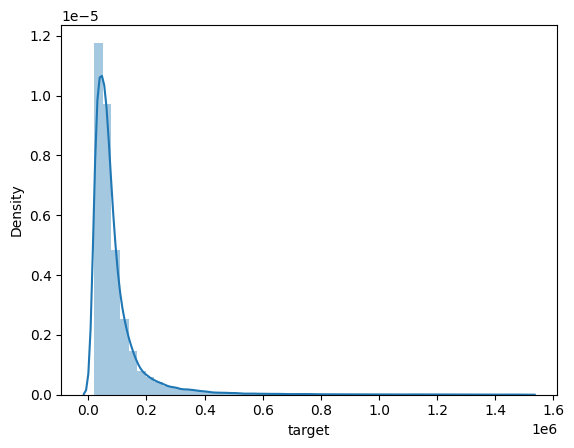

In [ ]:
sns.distplot(train_df['target']);

Как мы видим, целевая переменная `target` имеет правостороннюю ассиметрию.
Это может снизить эффективность моделей регрессии машинного обучения. Поэтому мы выполняем логарифмическое преобразование, и полученное распределение выглядит гораздо лучше.

/tmp/ipython-input-2340150721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['target']));


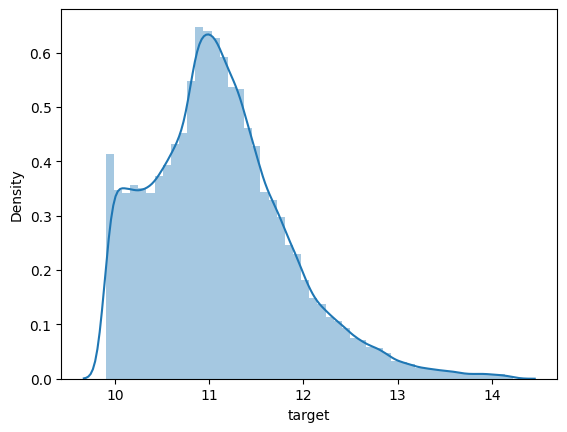

In [ ]:
sns.distplot(np.log(train_df['target']));

## Рассмотрим числовые и категориальные признаки и их пропущенные значения

In [ ]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  152
Number of Categorical features:  38


In [ ]:
total_numerical = train_df[numerical_feats].isnull().sum().sort_values(ascending=False)
percent_numerical = (train_df[numerical_feats].isnull().sum()/train_df[numerical_feats].isnull().count()).sort_values(ascending=False)
missing_data_numerical = pd.concat([total_numerical, percent_numerical], axis=1, keys=['Total', 'Percent'])
missing_data_numerical.head()

,Total,Percent
dp_payoutincomedata_payout_avg_prev_year,68915,0.897494
first_salary_income,68118,0.887115
avg_by_category__amount__sum__cashflowcategory_name__oteli,67925,0.884601
by_category__amount__sum__eoperation_type_name__perevod_s_karty_na_kartu,67700,0.881671
avg_by_category__amount__sum__cashflowcategory_name__set_supermarketov,67217,0.875381


In [ ]:
total_categorical = train_df[categorical_feats].isnull().sum().sort_values(ascending=False)
percent_categorical = (train_df[categorical_feats].isnull().sum()/train_df[categorical_feats].isnull().count()).sort_values(ascending=False)
missing_data_categorical = pd.concat([total_categorical, percent_categorical], axis=1, keys=['Total', 'Percent'])
missing_data_categorical.head()

,Total,Percent
hdb_bki_total_auto_max_limit,66648,0.867971
period_last_act_ad,65653,0.855013
hdb_bki_other_active_ip_outstanding,62367,0.812218
bki_total_ip_max_outstand,62329,0.811723
dp_address_unique_regions,61814,0.805017


## Целевая переменная target наиболее коррелирует с данными признаками:

1. turn_cur_cr_sum_v2 (0.630)

  - **Гипотеза:** Суммарный объем поступлений на счета за год прямо пропорционален уровню дохода.


2. avg_6m_all (0.570)

- **Гипотеза:** Общий уровень трат за полгода отражает финансовые возможности и коррелирует с доходом.


3. avg_cur_db_turn / avg_cur_cr_turn (0.557)

- **Гипотеза:** Обороты за последние 3 месяца лучше показывают текущее финансовое положение, чем долгосрочные данные.


4. avg_amount_daily_transactions_90d (0.514)

- **Гипотеза:** Интенсивность ежедневных операций — индикатор активного финансового поведения и высокого дохода.


5. avg_3m_all (0.510)

- **Гипотеза:** Недавние траты точнее предсказывают доход, чем исторические паттерны.


6. incomeValue (0.397)

- **Гипотеза:** Прямые данные о доходе дополняют картину, даже если частично недостоверны.

In [ ]:
df = train_df[numerical_feats].corr().target
res = pd.merge(df, missing_data_numerical, left_index=True, right_index=True).sort_values(ascending=False, by=['target'])
res[res['target'] > 0.4].drop(['target', 'w'])

,target,Total,Percent
first_salary_income,0.928217,68118,0.887115
salary_6to12m_avg,0.927699,61911,0.806280
dp_payoutincomedata_payout_sum_3_month,0.644542,65855,0.857643
dp_payoutincomedata_payout_avg_prev_year,0.630530,68915,0.897494
turn_cur_cr_sum_v2,0.630285,17354,0.226005
dp_ils_paymentssum_avg_12m,0.613925,60283,0.785078
avg_6m_all,0.570469,21656,0.282031
dp_payoutincomedata_payout_max_6_month,0.564312,65855,0.857643
dp_payoutincomedata_payout_max_3_month,0.561221,65855,0.857643
dp_ils_paymentssum_month_avg,0.558366,60283,0.785078


## Работа с категориальными признаками

In [ ]:
df_train_cat = train_df[categorical_feats]
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   dt                                    76786 non-null  object
 1   hdb_bki_total_max_limit               67413 non-null  object
 2   hdb_bki_total_cc_max_limit            63041 non-null  object
 3   gender                                76786 non-null  object
 4   adminarea                             57223 non-null  object
 5   hdb_bki_total_pil_max_limit           62001 non-null  object
 6   city_smart_name                       67323 non-null  object
 7   hdb_bki_other_active_pil_outstanding  35622 non-null  object
 8   dp_ewb_last_employment_position       15081 non-null  object
 9   hdb_bki_total_products                70561 non-null  object
 10  hdb_bki_total_max_overdue_sum         67257 non-null  object
 11  addrref                     

In [ ]:
def fill_categorical_missing_smart(train_df):
    categorical_columns = train_df.select_dtypes(include=['object']).columns

    # Анализируем каждый признак
    for col in categorical_columns:
        missing_count = train_df[col].isnull().sum()

        if missing_count == 0:
            continue  # пропускаем если нет пропусков

        # Если пропусков мало (<5%) - заполняем модой
        if missing_count / len(train_df) < 0.05:
            mode_value = train_df[col].mode()
            if len(mode_value) > 0:
                train_df[col] = train_df[col].fillna(mode_value[0])
            else:
                train_df[col] = train_df[col].fillna('MISSING')

        # Если пропусков много - заполняем 'MISSING' и создаем отдельную категорию
        else:
            train_df[col] = train_df[col].fillna('MISSING')

    return train_df

train_df_filled = fill_categorical_missing_smart(train_df.copy())
test_df_filled = fill_categorical_missing_smart(test_df.copy())
train_df_filled

,dt,target,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,adminarea,...,total_sum,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,max_balance_rur_amt_1m_af,w,first_salary_income
0,2024-04-30,109324.476325,NaN,52800.0,365346.244634,23213.0,97366.0,Женский,124649.0,Свердловская область,...,0.0,1.0,0.0,57.0,0.0,297.0,0.027027,NaN,0.301217,NaN
1,2024-02-29,25558.028662,NaN,260200.0,NaN,10000.0,32580.0,Женский,63653.0,Краснодарский край,...,0.0,NaN,0.0,707.0,67.0,30245.0,NaN,NaN,0.695800,NaN
2,2024-02-29,40666.753098,NaN,2000000.0,NaN,90000.0,96866.0,Женский,404545.0,Новосибирская область,...,0.0,NaN,422.0,0.0,0.0,210322.0,0.000000,NaN,0.515970,NaN
3,2024-04-30,43856.672058,NaN,75000.0,NaN,75000.0,43860.0,Мужской,39988.0,Хабаровский край,...,NaN,NaN,0.0,0.0,0.0,7187.0,0.000000,NaN,0.478003,NaN
4,2024-04-30,130420.851992,NaN,1000000.0,NaN,240000.0,83815.0,Женский,202439.0,Новосибирская область,...,NaN,NaN,0.0,84.0,0.0,690038.0,0.000000,NaN,0.552314,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76781,2024-06-30,68976.691400,NaN,MISSING,NaN,MISSING,NaN,Мужской,NaN,MISSING,...,0.0,NaN,NaN,NaN,MISSING,0.0,NaN,NaN,0.179016,NaN
76782,2024-01-31,50768.829700,NaN,MISSING,NaN,MISSING,NaN,Женский,NaN,MISSING,...,NaN,NaN,NaN,NaN,MISSING,0.0,NaN,NaN,0.395732,NaN
76783,2024-06-30,30613.920000,32967.213362,140000.0,NaN,140000.0,153541.0,Мужской,43428.0,MISSING,...,NaN,NaN,0.0,42.0,4798.0,20802.0,NaN,NaN,0.635623,NaN
76784,2024-05-31,81547.761138,NaN,19500.0,NaN,0.0,118742.0,Мужской,1162.0,г. Москва,...,NaN,NaN,NaN,NaN,MISSING,0.0,0.000000,NaN,0.029391,NaN


## Работа с числовыми данными

In [ ]:
def fill_numeric_missing_smart(train_df):
    numeric_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_columns:
        missing_count = train_df[col].isnull().sum()
        if missing_count == 0:
            continue
        missing_percent = (missing_count / len(train_df)) * 100
        if missing_percent < 5:
            # Мало пропусков - заполняем медианой (устойчива к выбросам)
            fill_value = train_df[col].median()

        elif missing_percent < 30:
            # Среднее количество пропусков - анализируем распределение
            skewness = train_df[col].skew()

            if abs(skewness) > 2:  # Сильно скошенное распределение
                fill_value = train_df[col].median()
            else:
                fill_value = train_df[col].mean()
        else:
            # Много пропусков (>30%) - используем специальные значения
            if 'salary' in col.lower() or 'income' in col.lower():
                fill_value = -1
            else:
                fill_value = train_df[col].median()

        train_df[col] = train_df[col].fillna(fill_value)

        if missing_percent > 10:
            train_df[f'{col}_missing'] = (train_df[col] == fill_value).astype(int)
    return train_df

train_df_filled = fill_numeric_missing_smart(train_df_filled.copy())
test_df_filled = fill_numeric_missing_smart(test_df.copy())
train_df_filled

/tmp/ipython-input-3820878115.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'{col}_missing'] = (train_df[col] == fill_value).astype(int)
/tmp/ipython-input-3820878115.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[f'{col}_missing'] = (train_df[col] == fill_value).astype(int)
/tmp/ipython-input-3820878115.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

,dt,target,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,adminarea,...,dp_ils_accpayment_month_avg_missing,avg_3m_all_missing,hdb_other_active_max_psk_missing,total_sum_missing,dp_ils_uniq_companies_1y_missing,avg_6m_travel_missing,avg_6m_government_services_missing,label_Above_1M_share_r1_missing,max_balance_rur_amt_1m_af_missing,first_salary_income_missing
0,2024-04-30,109324.476325,-1.000000,52800.0,365346.244634,23213.0,97366.000000,Женский,124649.0,Свердловская область,...,0,0,0,1,1,1,0,0,1,1
1,2024-02-29,25558.028662,-1.000000,260200.0,149711.981885,10000.0,32580.000000,Женский,63653.0,Краснодарский край,...,1,0,0,1,1,1,0,1,1,1
2,2024-02-29,40666.753098,-1.000000,2000000.0,149711.981885,90000.0,96866.000000,Женский,404545.0,Новосибирская область,...,1,0,0,1,1,0,1,1,1,1
3,2024-04-30,43856.672058,-1.000000,75000.0,149711.981885,75000.0,43860.000000,Мужской,39988.0,Хабаровский край,...,1,0,0,1,1,1,1,1,1,1
4,2024-04-30,130420.851992,-1.000000,1000000.0,149711.981885,240000.0,83815.000000,Женский,202439.0,Новосибирская область,...,1,0,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76781,2024-06-30,68976.691400,-1.000000,MISSING,149711.981885,MISSING,81682.344469,Мужской,74361.5,MISSING,...,1,1,1,1,1,1,1,1,1,1
76782,2024-01-31,50768.829700,-1.000000,MISSING,149711.981885,MISSING,81682.344469,Женский,74361.5,MISSING,...,1,1,1,1,1,1,1,1,1,1
76783,2024-06-30,30613.920000,32967.213362,140000.0,149711.981885,140000.0,153541.000000,Мужской,43428.0,MISSING,...,1,0,0,1,1,1,0,1,1,1
76784,2024-05-31,81547.761138,-1.000000,19500.0,149711.981885,0.0,118742.000000,Мужской,1162.0,г. Москва,...,1,1,0,1,1,1,1,1,1,1


## Таким образом, мы заполнили все пропуски в данных

In [ ]:
train_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Data columns (total 318 columns):
 #    Column                                                                                                   Non-Null Count  Dtype  
---   ------                                                                                                   --------------  -----  
 0    dt                                                                                                       76786 non-null  object 
 1    target                                                                                                   76786 non-null  float64
 2    salary_6to12m_avg                                                                                        76786 non-null  float64
 3    hdb_bki_total_max_limit                                                                                  76786 non-null  object 
 4    dp_ils_paymentssum_avg_12m                                                

In [ ]:
train_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Data columns (total 318 columns):
 #    Column                                                                                                   Non-Null Count  Dtype  
---   ------                                                                                                   --------------  -----  
 0    dt                                                                                                       76786 non-null  object 
 1    target                                                                                                   76786 non-null  float64
 2    salary_6to12m_avg                                                                                        76786 non-null  float64
 3    hdb_bki_total_max_limit                                                                                  76786 non-null  object 
 4    dp_ils_paymentssum_avg_12m                                                

## Обучение моделей

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
import numpy as np
X = train_df_filled.drop(['target', 'w'], axis=1)
y = train_df_filled['target']
weights = train_df_filled['w']
X_train, X_val, y_train, y_val, weights_train, weights_val = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}")

Train: (61428, 316), Validation: (15358, 316)


In [ ]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_val_numeric = X_val.select_dtypes(include=['int64', 'float64'])

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)

In [ ]:
def wmae(y_true, y_pred, weights):
    return (weights * np.abs(y_true - y_pred)).mean()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)#,
    # 'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    score = wmae(y_val, y_pred, weights_val)
    print(f"{name}: WMAE = {score:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31196
[LightGBM] [Info] Number of data points in the train set: 61428, number of used features: 274
[LightGBM] [Info] Start training from score 92310.770756


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM: WMAE = 43097.9945
XGBoost: WMAE = 44070.3783


In [ ]:
best_model = LGBMRegressor(n_estimators=200, random_state=42)
best_model.fit(X_train_scaled, y_train)
final_pred = best_model.predict(X_val_scaled)
final_wmae = wmae(y_val, final_pred, weights_val)
print(f"Финальный WMAE: {final_wmae:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.174548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31196
[LightGBM] [Info] Number of data points in the train set: 61428, number of used features: 274
[LightGBM] [Info] Start training from score 92310.770756


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Финальный WMAE: 42364.3940


## submission

In [ ]:
missing_features = set(X_train_numeric.columns) - set(test_df.columns)
for feature in missing_features:
    test_df[feature] = 0
test_df_numeric = test_df[X_train_numeric.columns]
X_test_scaled = scaler.transform(test_df_numeric)
test_predictions = best_model.predict(X_test_scaled)
submission = pd.DataFrame({
    'id': id_test,
    'target': test_predictions
})
submission.set_index('id').to_csv('submission.csv', decimal='.', sep=',')

/tmp/ipython-input-1134653005.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[feature] = 0
/tmp/ipython-input-1134653005.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[feature] = 0
/tmp/ipython-input-1134653005.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[featu